We can get the image spectrum using Pillow and Scipy

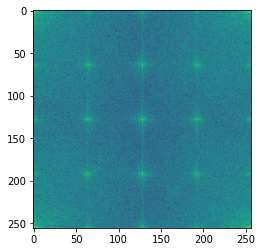

In [1]:
from PIL import Image
from scipy import fftpack
import matplotlib.pyplot as plt
import numpy as np

#Scipy can get the 2-dimensional FFT from an image
image = Image.open("mono.bmp")     
fft2 = fftpack.fft2(image)

plt.imshow(20*np.log10(abs(fft2))) #We show the absolute value in logarithmic scale
plt.show()

We can also get the image 2-dimensional FFT using OpenCV and Numpy

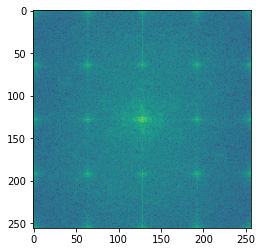

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#There's also a way to do it with OpenCV and numpy
img = cv2.imread('mono.bmp',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f) #This is done so we get the origin in the center of the plot
magnitude_spectrum = 20*np.log(np.abs(fshift)) #And again we plot the absolute value in logarithmic scale

plt.imshow(magnitude_spectrum)
plt.show()

The next part is just a test to see how a high pass filter works in an image, which is as an edge detection tool, and also to try and get the original image from the spectrum.

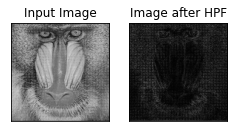

In [3]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
#The High Pass Filter works as an edge

plt.show()